In [ ]:
import pandas as pd

#data = pd.read_csv('entities.csv')
data = pd.read_csv('/content/drive/MyDrive/entities.csv')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_stopwords(df, column_name, language='english'):
    stop_words = set(stopwords.words(language))
    df[column_name] = df[column_name].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1 = remove_stopwords(data, 'transcripts')

In [ ]:
trctp = df1['transcripts']
alt_script = []
for tcpt in trctp:
  tcpt = tcpt.replace('\n', ' ')
  tcpt = tcpt.lower()
  alt_script.append(tcpt)

In [ ]:
df1.head()

,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities
0,joLk0IPEniA,WILL RAFALE BE A FACTOR THIS ELECTION? | FACEO...,"RafaleTwist DAY BEFORE POLLS, RAFALE BLOW TO G...",2019-04-10T16:41:10Z,CNN-News18,https://i.ytimg.com/vi/joLk0IPEniA/hqdefault.jpg,unanimously rejected government's contention o...,True,en,470,8,5.0,unanimously reject government \n contention ...,Hindu -> NORP\ntoday -> DATE\nSupreme Court ->...
1,Gc1tf5U7BuU,BJP Manifesto Promises To Secure &amp; Protect...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-08T14:19:22Z,CNN-News18,https://i.ytimg.com/vi/Gc1tf5U7BuU/hqdefault.jpg,top story 18 degrees south BJP released manife...,True,en,285,2,9.0,story 18 degree south \n BJP release manifes...,18 -> CARDINAL\nBJP -> ORG\ntoday -> DATE\nsha...
2,1BAgeFCwR3o,Reporters Project: Andhra Pradesh’s Politics O...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:22:24Z,CNN-News18,https://i.ytimg.com/vi/1BAgeFCwR3o/hqdefault.jpg,[Music] reporters project CNN news 18 reporter...,True,en,1431,3,11.0,reporter project CNN news 18 \n reporter fan...,CNN -> ORG\n18 -> CARDINAL\nApril 11th -> DATE...
3,HKCBxHhnfC4,Reporters Project: Giving Voice To The Real Is...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:20:19Z,CNN-News18,https://i.ytimg.com/vi/HKCBxHhnfC4/hqdefault.jpg,[Music] reporters project record stories CNN n...,True,en,146,2,2.0,reporter project \n record story CNN news 18...,CNN news -> ORG\n18 -> CARDINAL\nPakistan -> G...
4,iLlUz3a4zDg,“I Definitely Don&#39;t Fight A War To Lose” –...,On Off Centre Anuradha SenGupta is talking to ...,2019-04-06T10:28:52Z,CNN-News18,https://i.ytimg.com/vi/iLlUz3a4zDg/hqdefault.jpg,[Music] film stars stranger electoral politics...,True,en,16396,130,205.0,film star stranger electoral \n politic Lok ...,Lok Sabha -> ORG\nyear -> DATE\nLok Sabha -> O...


In [ ]:
# populate these words - use ohrases
NDA_dict = ['bjp', 'narendra', 'modi', 'pm', 'prime', 'minister', 'union', 'finance', 'central', 'forces','indian',
            'government','defense', 'nda', 'election','rss','religion','hindu','muslim', 'schemes','allah','pakistan',
            'pakistani','terror','terrorist','kashmir','370','j&k', 'income','tax', 'ed', 'enforcement', 'directorate',
            'citizenship','amendment','mandir','temple','ram', 'nitin', 'gadkari', 'economy', 'ashwini' , 'vaishnav' ,'railway',
            'external',  'affairs']
INDIA_dict = ['congress', 'upa', 'aap', 'gandhi',"gandhi's", 'priyanka', 'yatra','samajwadi','rahul', 'sonia','opposition',
              'i.n.d.i.a','india','left','communist',"joomla's",'tmc','mamta','citizenship','amendment', 'questioned']
support = ['magnificent', 'brilliant', 'curroption','effort','hopeful','capitalize','innovative','secretary','inaugurating',
           'boost']
critic = ['inflation', 'unemployment', 'farmers', 'waste', 'curropt', 'issues', 'public','backlash','anger','issue','problem',
          'probe','wrong','villain', 'questioned']

In [ ]:
import numpy as np

score_array = []
for script in alt_script:
  words = script.split(' ')
  x1 = 0
  x2 = 0
  x3 = 0
  x4 = 0
  x5 = 0
  for word in words:
    if word in NDA_dict:
      x1 = x1 + 1
    elif word in INDIA_dict:
      x2 = x2 + 1
    elif word in support:
      x3 = x3 + 1
    elif word in critic:
      x4 = x4 + 1
    else:
      x5 = x5 + 1
  #print(x1,x2,x3,x4,x5)
  score = round((np.log(((x1*x3 + x5)/(x2* x4 + x5))*((x1*x4 + x5)/(x2* x3 + x5)))),3)
  score_array.append(score)

In [ ]:
def score_calc(text):
  words = text.split(' ')
  x1 = 0
  x2 = 0
  x3 = 0
  x4 = 0
  x5 = 0
  for word in words:
    if word in NDA_dict:
      x1 = x1 + 1
    elif word in INDIA_dict:
      x2 = x2 + 1
    elif word in support:
      x3 = x3 + 1
    elif word in critic:
      x4 = x4 + 1
    else:
      x5 = x5 + 1
  #print(x1,x2,x3,x4,x5)
  score = round((np.log(((x1*x3 + x5)/(x2* x4 + x5))*((x1*x4 + x5)/(x2* x3 + x5)))),3)
  return score

In [ ]:
test = alt_script[112]
test

"[music] [music] loveliness came invited amnesty pardon spire bought needs break comes pondicherry english thinking mean want people ready control water [music] [music] good morning welcome taking first lesson surfing boat trying balance reached puducherry chennai [music] okay first lesson surfing least gave short always wanted thanks cali li surfing school puducherry long time 24 years really like puducherry surfing great time thank much good evening welcome else else country would get amalgamation melting point many cultures voodoo cherry yes i'm state puerto cherry one lok sabha seat though goes pole second phase election coming live today election express live today beautiful beach behind mahatma gandhi statue well least evening breeze made variable otherwise heat could could cool fantastic surfing lesson know lot would getting jealous talk politics usually cosmopolitan pondicherry fact rather called white treatment behind camera person ashok show that's famous cafe used one point 

In [ ]:
labels = []
for script in alt_script:
  sc = score_calc(script)
  if score > 0.01:
    labels.append('ProGov')
  elif score < -0.01:
    labels.append('AntiGov')
  else:
    labels.append('Neutral')

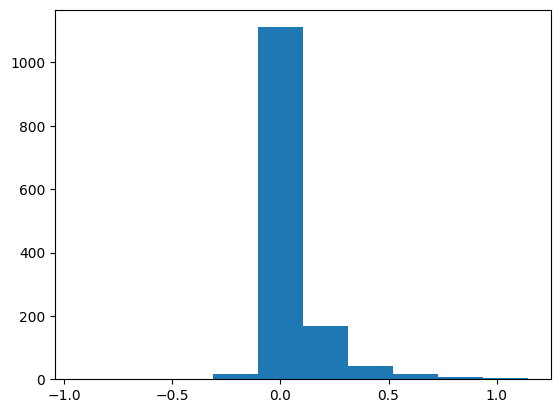

In [ ]:
import matplotlib.pyplot as plt

plt.hist(score_array)
plt.show()

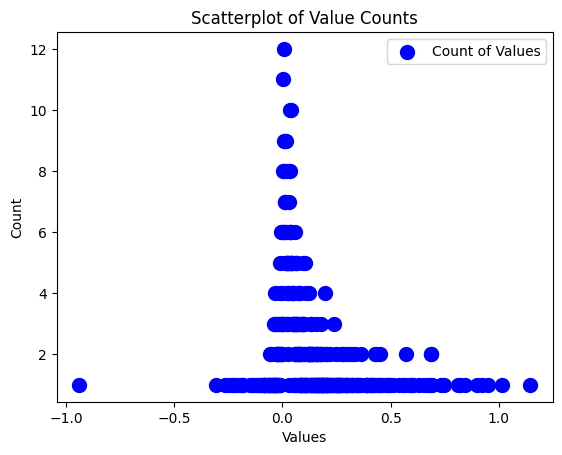

In [ ]:
value_counts = {}
for value in score_array:
  if value != 0:
    if value in value_counts:
        value_counts[value] += 1
    else:
        value_counts[value] = 1

# Extract values and counts from the dictionary
values = list(value_counts.keys())
counts = list(value_counts.values())

# Create a scatterplot
plt.scatter(values, counts, marker='o', s=100, c='b', label='Count of Values')
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Scatterplot of Value Counts')
plt.legend()
# Show the plot
plt.show()

In [ ]:
pro = 0
anti = 0
neut = 0

for score in score_array:
  if score > 0.01:
    pro = pro + 1
  elif score < -0.01:
    anti = anti + 1
  else:
    neut = neut + 1

print(pro,anti,neut)

576 89 703


In [ ]:
len(labels)

1368

In [ ]:
labels = pd.Series(labels, name = 'Label')

In [ ]:
dataframe = df1.merge(labels, left_index=True, right_index=True)

In [ ]:
dataframe.head()

,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities,Label
0,joLk0IPEniA,WILL RAFALE BE A FACTOR THIS ELECTION? | FACEO...,"RafaleTwist DAY BEFORE POLLS, RAFALE BLOW TO G...",2019-04-10T16:41:10Z,CNN-News18,https://i.ytimg.com/vi/joLk0IPEniA/hqdefault.jpg,unanimously rejected government's contention o...,True,en,470,8,5.0,unanimously reject government \n contention ...,Hindu -> NORP\ntoday -> DATE\nSupreme Court ->...,Neutral
1,Gc1tf5U7BuU,BJP Manifesto Promises To Secure &amp; Protect...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-08T14:19:22Z,CNN-News18,https://i.ytimg.com/vi/Gc1tf5U7BuU/hqdefault.jpg,top story 18 degrees south BJP released manife...,True,en,285,2,9.0,story 18 degree south \n BJP release manifes...,18 -> CARDINAL\nBJP -> ORG\ntoday -> DATE\nsha...,Neutral
2,1BAgeFCwR3o,Reporters Project: Andhra Pradesh’s Politics O...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:22:24Z,CNN-News18,https://i.ytimg.com/vi/1BAgeFCwR3o/hqdefault.jpg,[Music] reporters project CNN news 18 reporter...,True,en,1431,3,11.0,reporter project CNN news 18 \n reporter fan...,CNN -> ORG\n18 -> CARDINAL\nApril 11th -> DATE...,Neutral
3,HKCBxHhnfC4,Reporters Project: Giving Voice To The Real Is...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:20:19Z,CNN-News18,https://i.ytimg.com/vi/HKCBxHhnfC4/hqdefault.jpg,[Music] reporters project record stories CNN n...,True,en,146,2,2.0,reporter project \n record story CNN news 18...,CNN news -> ORG\n18 -> CARDINAL\nPakistan -> G...,Neutral
4,iLlUz3a4zDg,“I Definitely Don&#39;t Fight A War To Lose” –...,On Off Centre Anuradha SenGupta is talking to ...,2019-04-06T10:28:52Z,CNN-News18,https://i.ytimg.com/vi/iLlUz3a4zDg/hqdefault.jpg,[Music] film stars stranger electoral politics...,True,en,16396,130,205.0,film star stranger electoral \n politic Lok ...,Lok Sabha -> ORG\nyear -> DATE\nLok Sabha -> O...,Neutral


In [ ]:
dataframe.to_csv('National_Labelled_transcript.csv')